In [1]:
# imports
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [2]:
# Load the training data from the pickle files
with open('tra_X_tr.pkl', 'rb') as f:
    tra_X_tr = pickle.load(f)
with open('tra_Y_tr.pkl', 'rb') as f:
    tra_Y_tr = pickle.load(f)

# Convert data to pandas DataFrame for easier manipulation
df_tra_X_tr = pd.DataFrame(tra_X_tr[0][0].toarray()) # Convert sparse matrix to dense
df_tra_Y_tr = pd.DataFrame(tra_Y_tr[:, 0])  # Assuming target variable


In [3]:
# Feature Engineering
rolling_window_size = 4  # Rolling average over 4 intervals
for i in range(10):  # first 10 are location information
    df_tra_X_tr[f'rolling_mean_loc{i+1}'] = df_tra_X_tr.iloc[:, i].rolling(window=rolling_window_size).mean()

# Fill any NaN values resulting from the rolling operation
df_tra_X_tr.fillna(method='bfill', inplace=True)

# prepare y_train for model
y_train = df_tra_Y_tr.values.ravel()

# fit model on y_train values
p, d, q = 5, 2, 2 
arima_model = ARIMA(y_train, order=(p, d, q))
arima_result = arima_model.fit()

# predict on y_train
y_train_pred = arima_result.predict(start=d, end=len(y_train)-1)

C:\Users\20bur\AppData\Local\Temp\ipykernel_40300\4201253874.py:7: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_tra_X_tr.fillna(method='bfill', inplace=True)


In [4]:
# Evaluate ARIMA
mae = mean_absolute_error(y_train[d:], y_train_pred)
mean_sq_error = mean_squared_error(y_train[d:], y_train_pred)
rmse = np.sqrt(mean_sq_error)
r_sq = r2_score(y_train[d:], y_train_pred)

print(f"Training MAE: {mae}")
print(f"Training RMSE: {rmse}")
print(f"Training MSE: {mean_sq_error}")
print(f"Training R-squared: {r_sq}")


Training MAE: 0.01989706750035239
Training RMSE: 0.02854545682087776
Training MSE: 0.0008148431051125966
Training R-squared: 0.4046253201615285


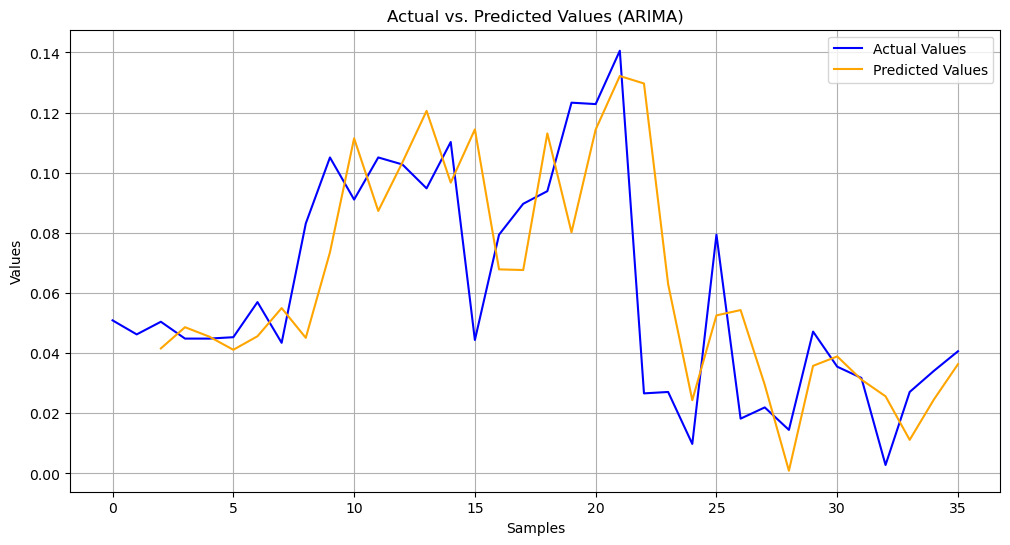

In [5]:
# Plotting Actual vs Predicted values
plt.figure(figsize=(12, 6))
plt.plot(y_train, label='Actual Values', color='blue')
plt.plot(range(d, len(y_train)), y_train_pred, label='Predicted Values', color='orange')
plt.title('Actual vs. Predicted Values (ARIMA)')
plt.xlabel('Samples')
plt.ylabel('Values')
plt.legend()
plt.grid()
plt.show()